In [2]:
import pandas as pd
import numpy as np
import re

pd.options.display.max_columns = None

#### Que:-01

In [3]:
# code here
df = pd.read_csv('https://tinyurl.com/2pfhncqw')

In [4]:
print(df.shape)
df.head()

(309910, 26)


,Unnamed: 0,rarity_score,last_sale_date,last_sale_price,total_supply,creation_date,verification_status,n_of_traits,contract_type,seller_fees,platform_fees,openrarity_enabled,has_website,has_own_twitter,has_discord,has_medium,n_tweets_in_range,avg_likes,avg_replies,avg_retweets,min_likes,min_replies,min_retweets,max_likes,max_replies,max_retweets
0,0,2.000000,2022-11,1.266732,1,2022-04,verified,2,own,1000.0,250,False,False,True,True,False,31,187.967742,8.290323,60.935484,0,0,2,591,28,380
1,1,97.077216,2021-08,1.200357,8888,2021-07,verified,5,own,500.0,250,False,False,True,True,False,11,133.181818,13.454545,55.181818,0,0,7,402,47,239
2,2,139.453086,2022-08,3.180572,8888,2021-07,verified,5,own,500.0,250,False,False,True,True,False,11,133.181818,13.454545,55.181818,0,0,7,402,47,239
3,3,127.753445,2021-08,3.502910,8888,2021-07,verified,5,own,500.0,250,False,False,True,True,False,11,133.181818,13.454545,55.181818,0,0,7,402,47,239
4,4,112.315719,2022-09,4.009567,8888,2021-07,verified,5,own,500.0,250,False,False,True,True,False,11,133.181818,13.454545,55.181818,0,0,7,402,47,239


In [5]:
df.pivot_table(index='verification_status',columns='contract_type',values=['rarity_score','last_sale_price'],aggfunc='sum').round(3)

last_sale_price              rarity_score             
contract_type               default         own       default          own
verification_status                                                       
approved                    658.932    1684.819  3.973082e+08   3929607.00
verified                    370.304  667394.863  2.475007e+06  41656543.98

#### Que:-02

In [6]:
# code here
df = pd.read_csv('https://tinyurl.com/2r24n45l')
df.head()

,Name,Year,Miles,Price
0,Chevrolet Trax,2018,41946,16990
1,GMC Terrain,2020,45328,23990
2,Jeep Wrangler,2012,81068,21590
3,Jeep Renegade,2019,35372,21590
4,BMW X,20173,68992,22990


In [7]:
df['Brand']=df['Name'].str.split(" ").str.get(0)

In [8]:
df.sample(5)

,Name,Year,Miles,Price,Brand
19770,Ford EcoSport,2020,26990,22590,Ford
3401,Honda HR-V,2019,51310,21200,Honda
1301,Dodge Journey,2020,21885,22990,Dodge
15035,Toyota Corolla,2020,39799,20590,Toyota
12796,GMC Terrain,2017,71349,17990,GMC


In [9]:
import re
int(re.findall(r"\d{4}", str(2015))[0]) 

2015

In [10]:
df['Year']=df['Year'].apply(lambda x:int(re.findall(r"\d{4}",str(x))[0]))

In [11]:
df.sample(5)

,Name,Year,Miles,Price,Brand
9276,Jeep Compass,2021,45849,22590,Jeep
3305,Nissan Murano,2020,58739,21998,Nissan
18724,Volkswagen Golf,2015,88289,14990,Volkswagen
14553,Honda Accord,2014,66197,18990,Honda
8151,Chevrolet Equinox,2019,47913,18950,Chevrolet


In [12]:
pt=df.query('Year>=2018 and Year<=2022').pivot_table(index='Brand',columns='Year',values=['Price','Miles'],aggfunc={'Price':'mean','Miles':'median'})

In [13]:
pt

Miles                                             Price  \
Year              2018     2019     2020     2021     2022          2018   
Brand                                                                      
Acura          32516.0  50959.0  30894.0  10922.0      NaN  25323.333333   
Alfa           38908.0  20928.0      NaN      NaN      NaN  28490.000000   
Audi           49762.0  50169.5  30423.5  11205.0  20917.0  30345.555556   
BMW            39269.0  36306.0  23171.0  19978.0   3780.0  31762.093023   
Buick          50702.0  41152.0  36626.0  39884.0    372.0  21516.254545   
Cadillac       57116.0  29609.0  41046.0      NaN      NaN  28390.000000   
Chevrolet      53355.0  46375.0  50743.0  37527.0  13022.0  21262.413043   
Chrysler       64685.5  65963.0  48960.0  44225.0  24427.0  24125.062500   
Dodge          78986.0  65497.0  30995.5  32159.5   9089.0  20807.283951   
FIAT           24731.0  14573.0      NaN      NaN      NaN  22602.500000   
Ford           50572.0  47657.5  49136.0  22391.0   5298.5  20214.190283   
GMC            54181.0  54017.0  54055.0  41904.5   9854.0  26052.206897   
Genesis        42192.0  16855.0      NaN  16937.0  13938.5  28839.000000   
Honda          46242.0  39322.0  35812.0   9286.0  18500.0  24265.054054   
Hyundai        56075.0  44910.0  35882.5  31592.0   8160.0  19335.487603   
INFINITI       49555.5  61327.0  47858.0  35966.0      NaN  26140.000000   
Jaguar         35119.0  30563.0  17456.0   6943.0      NaN  33323.333333   
Jeep           53690.5  21836.5  41416.0  44188.5   8662.5  21362.570175   
Kia            37993.0  27189.0  37605.0  32006.0  14114.0  21565.608108   
Land           58929.0  41484.0  36232.0      NaN      NaN  39990.000000   
Lexus          53174.0  25356.5  21377.5  18073.0  20985.0  36056.666667   
Lincoln        43874.0  23501.5  50080.0      NaN   9494.0  26462.785714   
MAZDA          44267.0  37844.0  31832.0  41606.0   2338.0  22720.603448   
MINI           36562.0  35508.0  13268.0      NaN   5758.5  25065.000000   
Maserati           NaN  28766.0      NaN      NaN   5339.0           NaN   
Mercedes-Benz  31408.5  28937.0  22008.0  12435.0  10880.0  34910.000000   
Mitsubishi     48827.0  45100.0  39941.0  31809.0   6774.0  17137.058824   
Nissan         39266.0  37208.0  49741.0  41186.0   9975.0  20050.358209   
Polestar           NaN      NaN      NaN      NaN   6188.0           NaN   
Porsche        47451.0      NaN      NaN      NaN      NaN  45156.666667   
Ram            43299.0  41717.5  27715.5  30617.0   3664.5  34990.000000   
Subaru         51900.0  40909.0  19885.0  44615.0   9899.0  23732.857143   
Tesla          32481.0  26977.5  24383.0  15517.0   6454.0  42923.333333   
Toyota         45770.0  19796.0  37726.0  20862.0   6769.0  22926.622449   
Volkswagen     50991.0  46335.0  30069.0  23098.0  14056.5  21447.142857   
Volvo          79121.0  23902.0  41457.5  36590.0   1758.0  27306.666667   
smart          14825.0      NaN      NaN      NaN      NaN  17765.000000   

                                                                        
Year                   2019          2020          2021           2022  
Brand                                                                   
Acura          34496.777778  37590.000000  43856.666667            NaN  
Alfa           30475.714286           NaN           NaN            NaN  
Audi           28590.000000  32490.000000  71990.000000   39590.000000  
BMW            33280.909091  39811.083333  37062.727273   57030.000000  
Buick          21033.632653  24141.947368  25796.842105   26940.000000  
Cadillac       32290.000000  38777.266667           NaN            NaN  
Chevrolet      21119.717647  24684.226950  25234.727273   42358.421053  
Chrysler       26628.142857  28668.142857  26471.978723   35190.000000  
Dodge          23036.666667  26782.535714  32565.357143   36256.666667  
FIAT           23904.285714           NaN           NaN            NaN  
Ford           21698.428571

<Axes: ylabel='Density'>

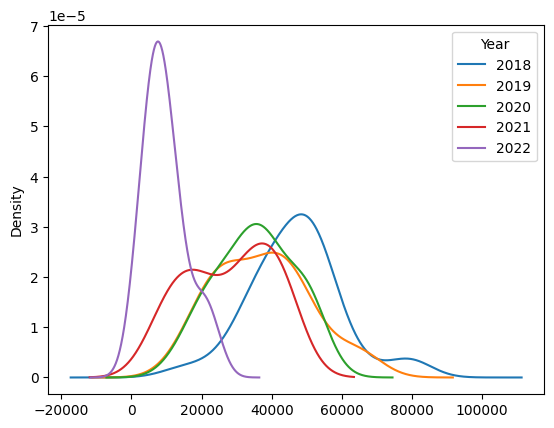

In [14]:
pt['Miles'].plot(kind='kde')

<Axes: ylabel='Density'>

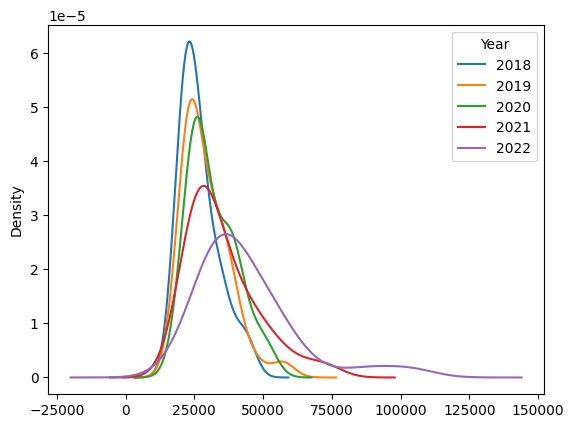

In [15]:
pt['Price'].plot(kind='kde')

#### Que:-03

In [16]:
# code here
df = pd.read_csv('https://tinyurl.com/2nq6kugt')
df.head()

,Dates,Power Station,Monitored Cap.(MW),Total Cap. Under Maintenace (MW),Planned Maintanence (MW),Forced Maintanence(MW),Other Reasons (MW),Programme or Expected(MU),Actual(MU),Excess(+) / Shortfall (-),Deviation
0,2017-09-01,Delhi,2235.4,135.00,0.00,135.0,0,13,18,5.00,0.0
1,2017-09-01,Haryana,2720.0,2470.00,0.00,2470.0,0,28,7,-21.80,0.0
2,2017-09-01,Himachal Pradesh,3378.0,379.00,0.00,231.0,0,40,46,5.63,0.0
3,2017-09-01,Jammu and Kashmir,1285.0,150.00,0.00,0.0,0,14,23,9.43,0.0
4,2017-09-01,Punjab,3826.3,2697.65,77.65,2620.0,0,39,17,-21.69,0.0


In [17]:
df.shape

(345273, 11)

In [18]:
df['Required'] = df['Actual(MU)'] - df['Excess(+) / Shortfall (-)']
df.head()

,Dates,Power Station,Monitored Cap.(MW),Total Cap. Under Maintenace (MW),Planned Maintanence (MW),Forced Maintanence(MW),Other Reasons (MW),Programme or Expected(MU),Actual(MU),Excess(+) / Shortfall (-),Deviation,Required
0,2017-09-01,Delhi,2235.4,135.00,0.00,135.0,0,13,18,5.00,0.0,13.00
1,2017-09-01,Haryana,2720.0,2470.00,0.00,2470.0,0,28,7,-21.80,0.0,28.80
2,2017-09-01,Himachal Pradesh,3378.0,379.00,0.00,231.0,0,40,46,5.63,0.0,40.37
3,2017-09-01,Jammu and Kashmir,1285.0,150.00,0.00,0.0,0,14,23,9.43,0.0,13.57
4,2017-09-01,Punjab,3826.3,2697.65,77.65,2620.0,0,39,17,-21.69,0.0,38.69


In [19]:
df['Month']=pd.to_datetime(df['Dates']).dt.month_name()

In [20]:
df.sample(5)

,Dates,Power Station,Monitored Cap.(MW),Total Cap. Under Maintenace (MW),Planned Maintanence (MW),Forced Maintanence(MW),Other Reasons (MW),Programme or Expected(MU),Actual(MU),Excess(+) / Shortfall (-),Deviation,Required,Month
287777,2022-02-11,West Bengal,6356.00,1287.00,228.00,800.0,0,73,102,28.18,0.0,73.82,February
334148,2022-05-27,GMR ENERG,1050.00,0.00,0.00,0.0,0,0,23,0.64,0.0,22.36,May
180793,2020-07-02,Assam,464.35,64.97,9.96,24.0,0,4,4,-0.28,0.0,4.28,July
8882,2017-10-24,NTPC Ltd.,14633.59,2298.00,0.00,1980.0,0,225,276,51.71,0.0,224.29,October
270758,2021-11-20,SEPL,600.00,600.00,0.00,600.0,0,0,0,0.00,0.0,0.00,November


In [21]:
top_10=df['Power Station'].value_counts().head(10).index.to_list()

In [22]:
pt = df[df['Power Station'].isin(top_10)].pivot_table(index='Month',columns='Power Station',values='Required',aggfunc='sum')
pt

Power Station,APL,GMR ENERG,IBPIL,JPPVL,JSWEL,NHPC,NLC,NPCIL,NTPC Ltd.,TATA PCL
Month,,,,,,,,,,
April,19533.71,3717.59,0.0,3980.52,2944.53,8383.42,6793.71,12896.85,88307.99,2396.70
August,22577.58,4608.33,0.0,4914.53,3938.23,16586.55,8366.19,17945.07,111603.60,2814.73
December,27019.82,5111.68,0.0,5028.26,4741.91,4601.54,9348.39,20564.05,123936.52,2937.99
February,23695.95,4024.02,0.0,3972.52,4365.17,4465.50,8593.60,15943.00,103746.01,2590.94
January,25105.57,4424.09,0.0,4266.63,4704.94,3678.36,9195.73,17711.41,111747.49,2596.91
July,23540.14,4134.48,0.0,3687.77,3666.14,16843.71,8092.45,17288.12,110625.67,2983.62
June,23657.85,4236.74,0.0,5598.50,3769.82,15368.68,7434.07,17410.60,111109.54,3037.92
March,35757.22,5926.42,0.0,5791.59,6069.21,10352.03,12625.23,26475.12,158101.77,4334.42
May,20492.34,3739.89,0.0,4340.72,3129.34,11092.55,6735.69,13446.66,93214.38,2442.60


<Axes: xlabel='Month'>

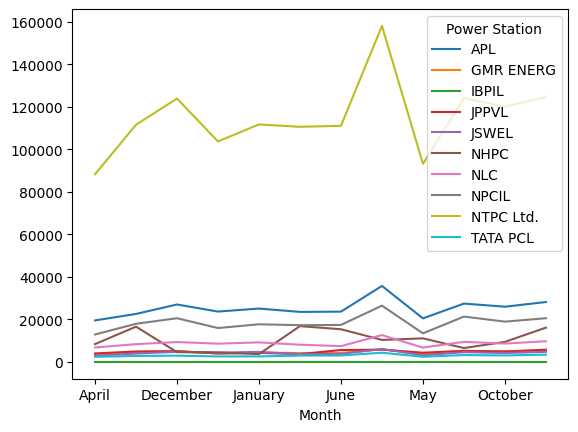

In [23]:
pt.plot(kind='line')

#### Que:-6 to 10

In [79]:
# code her
log_file = pd.read_csv("https://docs.google.com/spreadsheets/d/e/2PACX-1vT-OMrmmNdOTM-B5f5F1EpCutMVG230UZiLvqlsg0NIKUKR3yrqiI2r1pEX-LvSEk-3WwySPYtvbBC-/pub?gid=1937029224&single=true&output=csv")
employee = pd.read_csv("https://docs.google.com/spreadsheets/d/e/2PACX-1vQ5AuFqRjSZVBKm5zyDxquX6utubq1DJKkYDI70vjeidAnyAu70KMSYpMYzeVSNVTeUIJBpfF6jU5E6/pub?gid=798824749&single=true&output=csv")

In [80]:
log_file.head()

,Log_ID,dt,dept,emp_id,activity,eqpt
0,1000,2022-01-07,Dept6,115,Cleaning,UPS
1,1001,2022-01-08,Dept4,105,Cleaning,Generator
2,1002,2022-01-09,Dept3,112,Inspection,CPU
3,1003,2022-01-10,Dept4,120,Inspection,UPS
4,1004,2022-01-11,Dept3,138,Checking,Battery


In [81]:
log_file['dt'] = pd.to_datetime(log_file['dt'])

In [82]:
log_file['month']=pd.to_datetime(log_file['dt']).dt.month_name()

In [83]:
log_file.pivot_table(index='month',columns='activity',aggfunc='count')['Log_ID']

activity,Checking,Cleaning,Inspection,Repair
month,,,,
April,5,11,9,5
August,8,10,9,4
December,6,7,12,6
February,7,7,4,10
January,7,10,9,5
July,6,6,14,5
June,5,7,8,10
March,8,6,5,12
May,5,8,7,11


In [84]:
log_file.query('month=="January"')['emp_id'].value_counts().head(1)

emp_id
122    3
Name: count, dtype: int64

In [85]:
log_file[log_file['dt'].dt.day_of_week>4]['emp_id'].value_counts().head(1)

emp_id
144    6
Name: count, dtype: int64

In [86]:
log_file[log_file['dt'].dt.day_of_week <= 4]['activity'].value_counts().head(1)

activity
Inspection    77
Name: count, dtype: int64

In [87]:
log_file['day']=log_file['dt'].dt.day_name()
log_file.head()

,Log_ID,dt,dept,emp_id,activity,eqpt,month,day
0,1000,2022-01-07,Dept6,115,Cleaning,UPS,January,Friday
1,1001,2022-01-08,Dept4,105,Cleaning,Generator,January,Saturday
2,1002,2022-01-09,Dept3,112,Inspection,CPU,January,Sunday
3,1003,2022-01-10,Dept4,120,Inspection,UPS,January,Monday
4,1004,2022-01-11,Dept3,138,Checking,Battery,January,Tuesday


In [88]:
log_file.pivot_table(index='day',columns='activity',aggfunc='count')['Log_ID']

activity,Checking,Cleaning,Inspection,Repair
day,,,,
Friday,8,16,20,9
Monday,10,14,13,15
Saturday,18,11,8,15
Sunday,13,13,15,11
Thursday,8,16,16,12
Tuesday,15,9,15,13
Wednesday,14,9,13,16


In [89]:
employee

,EMPLOYEE_ID,FIRST_NAME,LAST_NAME,EMAIL
0,100,Steven,King,SKING
1,101,Neena,Kochhar,NKOCHHAR
2,102,Lex,De Haan,LDEHAAN
3,103,Alexander,Hunold,AHUNOLD
4,104,Bruce,Ernst,BERNST
5,105,David,Austin,DAUSTIN
6,106,Valli,Pataballa,VPATABAL
7,107,Diana,Lorentz,DLORENTZ
8,108,Nancy,Greenberg,NGREENBE
9,109,Daniel,Faviet,DFAVIET


In [90]:
fill_values=employee[employee['FIRST_NAME'].isnull()].apply(lambda x:x['EMAIL'][0] + x['LAST_NAME'][0],axis=1)

In [91]:
fill_values

12    JU
21    AF
32    TO
dtype: object

In [92]:
employee['FIRST_NAME'].fillna(fill_values,inplace=True)

C:\Users\mahes\AppData\Local\Temp\ipykernel_15232\553705550.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  employee['FIRST_NAME'].fillna(fill_values,inplace=True)


In [93]:
employee

,EMPLOYEE_ID,FIRST_NAME,LAST_NAME,EMAIL
0,100,Steven,King,SKING
1,101,Neena,Kochhar,NKOCHHAR
2,102,Lex,De Haan,LDEHAAN
3,103,Alexander,Hunold,AHUNOLD
4,104,Bruce,Ernst,BERNST
5,105,David,Austin,DAUSTIN
6,106,Valli,Pataballa,VPATABAL
7,107,Diana,Lorentz,DLORENTZ
8,108,Nancy,Greenberg,NGREENBE
9,109,Daniel,Faviet,DFAVIET


In [94]:
employee['EMAIL'] = employee['EMAIL'].str.lower()
employee['EMAIL'] = employee['EMAIL'] + '@campusx.com'

In [95]:
employee

,EMPLOYEE_ID,FIRST_NAME,LAST_NAME,EMAIL
0,100,Steven,King,sking@campusx.com
1,101,Neena,Kochhar,nkochhar@campusx.com
2,102,Lex,De Haan,ldehaan@campusx.com
3,103,Alexander,Hunold,ahunold@campusx.com
4,104,Bruce,Ernst,bernst@campusx.com
5,105,David,Austin,daustin@campusx.com
6,106,Valli,Pataballa,vpatabal@campusx.com
7,107,Diana,Lorentz,dlorentz@campusx.com
8,108,Nancy,Greenberg,ngreenbe@campusx.com
9,109,Daniel,Faviet,dfaviet@campusx.com


In [96]:
temp_df = log_file[log_file['activity'].isin(['Incpection', 'Cleaning', 'Checking'])]

In [97]:
x_df = temp_df.merge(employee,right_on='EMPLOYEE_ID',left_on='emp_id')

In [98]:
x_df

,Log_ID,dt,dept,emp_id,activity,eqpt,month,day,EMPLOYEE_ID,FIRST_NAME,LAST_NAME,EMAIL
0,1000,2022-01-07,Dept6,115,Cleaning,UPS,January,Friday,115,Alexander,Khoo,akhoo@campusx.com
1,1001,2022-01-08,Dept4,105,Cleaning,Generator,January,Saturday,105,David,Austin,daustin@campusx.com
2,1004,2022-01-11,Dept3,138,Checking,Battery,January,Tuesday,138,Stephen,Stiles,sstiles@campusx.com
3,1012,2022-01-19,Dept2,119,Cleaning,Server,January,Wednesday,119,Karen,Colmenares,kcolmena@campusx.com
4,1014,2022-01-21,Dept4,127,Checking,Battery,January,Friday,127,James,Landry,jlandry@campusx.com
...,...,...,...,...,...,...,...,...,...,...,...,...
136,1358,2022-12-31,Dept2,140,Checking,Fan,December,Saturday,140,Joshua,Patel,jpatel@campusx.com
137,1359,2023-01-01,Dept3,122,Cleaning,Pump,January,Sunday,122,Payam,Kaufling,pkaufling@campusx.com
138,1361,2023-01-03,Dept4,116,Checking,Server,January,Tuesday,116,Shelli,Baida,sbaida@campusx.com
139,1362,2023-01-04,Dept4,110,Checking,CPU,January,Wednesday,110,John,Chen,jchen@campusx.com
